In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression as lr
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsRegressor as knr
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.preprocessing import Imputer, normalize, scale, MinMaxScaler, LabelBinarizer, RobustScaler
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt
from sklearn.cross_validation import KFold, train_test_split as tts
from catboost import CatBoostRegressor as cbr
from sklearn.tree import DecisionTreeRegressor as dtr
import math
mms = MinMaxScaler()
rc = RobustScaler()

In [2]:
df = pd.read_csv('C:/Users/Visha/Downloads/Compressed/train.csv', header = 0, index_col = None, delimiter = ',')

In [3]:
#del df['vendor_id']

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


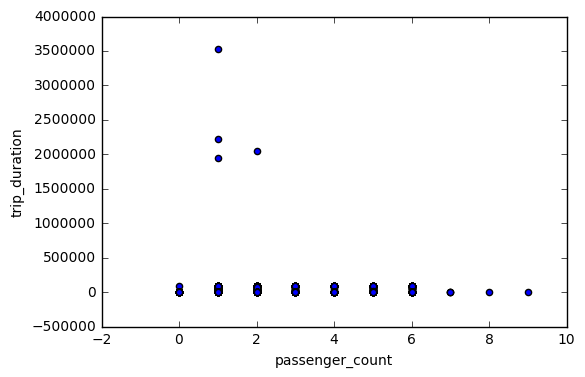

In [7]:
%matplotlib inline
df.plot.scatter('passenger_count', 'trip_duration')

In [8]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [9]:
df[['pickup_datetime', 'dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 2 columns):
pickup_datetime     1458644 non-null datetime64[ns]
dropoff_datetime    1458644 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 22.3 MB


In [10]:
df = pd.get_dummies(df, columns = ["store_and_fwd_flag", "vendor_id"])

In [11]:
df.head()

,id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,vendor_id_1,vendor_id_2
0,id2875421,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,1.0,0.0,0.0,1.0
1,id2377394,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.0,0.0,1.0,0.0
2,id3858529,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,1.0,0.0,0.0,1.0
3,id3504673,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,1.0,0.0,0.0,1.0
4,id2181028,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,1.0,0.0,0.0,1.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 13 columns):
id                      1458644 non-null object
pickup_datetime         1458644 non-null datetime64[ns]
dropoff_datetime        1458644 non-null datetime64[ns]
passenger_count         1458644 non-null int64
pickup_longitude        1458644 non-null float64
pickup_latitude         1458644 non-null float64
dropoff_longitude       1458644 non-null float64
dropoff_latitude        1458644 non-null float64
trip_duration           1458644 non-null int64
store_and_fwd_flag_N    1458644 non-null float64
store_and_fwd_flag_Y    1458644 non-null float64
vendor_id_1             1458644 non-null float64
vendor_id_2             1458644 non-null float64
dtypes: datetime64[ns](2), float64(8), int64(2), object(1)
memory usage: 144.7+ MB


In [13]:
print(df[df['passenger_count'] == 0]['trip_duration'].describe())
print(df[df['passenger_count'] != 0]['trip_duration'].describe())

count       60.000000
mean      1718.433333
std      11072.157098
min          1.000000
25%          6.750000
50%         20.500000
75%         92.250000
max      85901.000000
Name: trip_duration, dtype: float64
count    1.458584e+06
mean     9.594611e+02
std      5.237064e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64


In [14]:
df.drop(df[df['passenger_count'] == 0].index, inplace = 1)

In [15]:
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [16]:
df[['pickup_longitude', 'pickup_latitude']].describe()

,pickup_longitude,pickup_latitude
count,1.458584e+06,1.458584e+06
mean,-7.397349e+01,4.075092e+01
std,7.090225e-02,3.288019e-02
min,-1.219333e+02,3.435970e+01
25%,-7.399187e+01,4.073735e+01
50%,-7.398174e+01,4.075410e+01
75%,-7.396733e+01,4.076836e+01
max,-6.133553e+01,5.188108e+01


In [17]:
df[['dropoff_longitude', 'dropoff_latitude']].describe()

,dropoff_longitude,dropoff_latitude
count,1.458584e+06,1.458584e+06
mean,-7.397342e+01,4.075180e+01
std,7.064353e-02,3.588951e-02
min,-1.219333e+02,3.218114e+01
25%,-7.399133e+01,4.073589e+01
50%,-7.397975e+01,4.075452e+01
75%,-7.396302e+01,4.076981e+01
max,-6.133553e+01,4.392103e+01


In [18]:
df[['pickup_datetime', 'dropoff_datetime']].describe()

,pickup_datetime,dropoff_datetime
count,1458584,1458584
unique,1380164,1380320
top,2016-02-09 21:03:38,2016-02-19 19:25:04
freq,5,5
first,2016-01-01 00:00:17,2016-01-01 00:03:31
last,2016-06-30 23:59:39,2016-07-01 23:02:03


In [19]:
df[df['trip_duration'] == df.trip_duration.max()]

,id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,vendor_id_1,vendor_id_2
978383,id0053347,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,3526282,1.0,0.0,1.0,0.0


In [20]:
df['pmonth'] = df['pickup_datetime'].dt.month
df['dmonth'] = df['pickup_datetime'].dt.month
df['pday'] = df['pickup_datetime'].dt.day
df['dday'] = df['dropoff_datetime'].dt.day
df['phour'] = df['pickup_datetime'].dt.hour
df['dhour'] = df['dropoff_datetime'].dt.hour
df['pminute'] = df['pickup_datetime'].dt.minute
df['dminute'] = df['dropoff_datetime'].dt.minute
df['pseconds'] = df['pickup_datetime'].dt.second
df['dseconds'] = df['dropoff_datetime'].dt.second

In [21]:
del df['pickup_datetime']

In [22]:
del df['dropoff_datetime']

In [23]:
df.head()

,id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,vendor_id_1,...,pmonth,dmonth,pday,dday,phour,dhour,pminute,dminute,pseconds,dseconds
0,id2875421,1,-73.982155,40.767937,-73.964630,40.765602,455,1.0,0.0,0.0,...,3,3,14,14,17,17,24,32,55,30
1,id2377394,1,-73.980415,40.738564,-73.999481,40.731152,663,1.0,0.0,1.0,...,6,6,12,12,0,0,43,54,35,38
2,id3858529,1,-73.979027,40.763939,-74.005333,40.710087,2124,1.0,0.0,0.0,...,1,1,19,19,11,12,35,10,24,48
3,id3504673,1,-74.010040,40.719971,-74.012268,40.706718,429,1.0,0.0,0.0,...,4,4,6,6,19,19,32,39,31,40
4,id2181028,1,-73.973053,40.793209,-73.972923,40.782520,435,1.0,0.0,0.0,...,3,3,26,26,13,13,30,38,55,10


In [24]:
df['approx_dist'] = np.sqrt((df.pickup_longitude - df.dropoff_longitude)**2 + (df.pickup_latitude - df.dropoff_latitude)**2)

In [25]:
df.columns

Index(['id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'vendor_id_1',
       'vendor_id_2', 'pmonth', 'dmonth', 'pday', 'dday', 'phour', 'dhour',
       'pminute', 'dminute', 'pseconds', 'dseconds', 'approx_dist'],
      dtype='object')

In [26]:
cols = (df.columns) - ['id', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
df1 = df[cols]

C:\Users\visha\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [27]:
df1.head()

,approx_dist,dday,dhour,dminute,dmonth,dseconds,passenger_count,pday,phour,pminute,pmonth,pseconds,store_and_fwd_flag_N,store_and_fwd_flag_Y,trip_duration,vendor_id_1,vendor_id_2
0,0.017680,14,17,32,3,30,1,14,17,24,3,55,1.0,0.0,455,0.0,1.0
1,0.020456,12,0,54,6,38,1,12,0,43,6,35,1.0,0.0,663,1.0,0.0
2,0.059934,19,12,10,1,48,1,19,11,35,1,24,1.0,0.0,2124,0.0,1.0
3,0.013438,6,19,39,4,40,1,6,19,32,4,31,1.0,0.0,429,0.0,1.0
4,0.010690,26,13,38,3,10,1,26,13,30,3,55,1.0,0.0,435,0.0,1.0


In [28]:
y = df1.trip_duration
X = df1.drop('trip_duration', axis = 1)

In [40]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.75, random_state = 7)

In [30]:
X_train.shape

(145858, 16)

In [31]:
X_test.shape

(1312726, 16)

In [32]:
for i in y_train:
    if i == 0:
        print("boo")

In [33]:
y_test.shape

(1312726,)

In [30]:
clf = lr(normalize = 0, n_jobs = -1)

In [44]:
clf.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform')

In [35]:
x1 = clf.predict(X_test)
x2 = np.array(x1)
for i in range(len(x2)):
    x2[i] = math.ceil(x2[i])
y1 = np.array(y_test)
p = 0.0
r = 0.0
sum = 0.0
for i in range(len(y1)):
    sum += (np.log(x2[i] + 1) - np.log(y1[i] + 1))**2
(sum/len(x1))**0.5

nan

In [48]:
clf2.score(X_test, y_test)

0.054519044685428453

In [42]:
clf1 = knr(n_neighbors = 7, weights = 'distance')

In [37]:
clf1.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='distance')

In [46]:
clf2 = rfr(n_estimators = 20, max_features = 'auto')

In [47]:
clf2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [34]:
clf3 = svm.SVR(kernel = 'poly', degree = 2)

In [ ]:
clf3.fit(rc.fit_transform(X_train), rc.fit_transform(y_train))

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:965: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:987: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:965: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single fea

SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [59]:
clf4 = dtr(splitter = 'random', max_features = 'log2', random_state = 7)

In [60]:
clf4.fit(rc.fit_transform(X_train), rc.fit_transform(y_train))

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:965: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:987: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:965: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single fea

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='log2',
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=7,
           splitter='random')